In [19]:
######################## PetFinder Malaysia Modeling ##############################

#author: Zoë Kimpel
#date: 4.25.19

#libraries
import sys
import collections
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn import tree
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

plt.style.use('bmh')
%matplotlib inline

In [4]:
#import the dataset

pet = pd.read_csv('train_features_w_state_info.csv', sep = ',')

pet.describe()

,Type,Age,Age_Yr,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,VideoAmt,PhotoAmt,AdoptionSpeed,Population,TotalArea(km2),HDI,Population_Density,2017GDPpercapita_USD,2017GDPpercapita_RM
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457547,10.452078,0.651637,265.287267,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,41346.028347,0.056760,3.889215,2.516441,4.212681e+06,6726.458747,0.814669,2395.926644,15818.693991,62912.072634
std,0.498211,18.155790,1.558780,60.024977,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,32.444153,0.346185,3.487810,1.177265,1.991900e+06,6973.628714,0.013912,2878.851275,7254.001448,28848.942564
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,41324.000000,0.000000,0.000000,0.000000,9.680000e+04,91.000000,0.674000,21.181197,3417.000000,13593.000000
25%,1.000000,2.000000,0.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,41326.000000,0.000000,2.000000,2.000000,1.768000e+06,243.000000,0.819000,724.839585,12092.000000,48091.000000
50%,1.000000,3.000000,0.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,41326.000000,0.000000,3.000000,2.000000,5.874100e+06,8104.000000,0.819000,724.839585,12092.000000,48091.000000
75%,2.000000,12.000000,1.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,41401.000000,0.000000,5.000000,4.000000,5.874100e+06,8104.000000,0.822000,7275.720165,27991.000000,111321.000000
max,2.000000,255.000000,21.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,41415.000000,8.000000,30.000000,4.000000,5.874100e+06,124450.000000,0.822000,7275.720165,27991.000000,111321.000000


In [4]:
#check for missing
#% of columns that are NA
columns = pet.columns
percent_missing = pet.isnull().sum() * 100 / len(pet)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

#name is missing - remove column from final training set

,column_name,percent_missing
Type,Type,0.000000
Sterilized,Sterilized,0.000000
Sterilized_Name,Sterilized_Name,0.000000
Health,Health,0.000000
Health_Name,Health_Name,0.000000
Quantity,Quantity,0.000000
Fee,Fee,0.000000
State,State,0.000000
State_Label,State_Label,0.000000
RescuerID,RescuerID,0.000000


In [21]:
###################### Modeling ######################

#dataprep

#split into X & Y
X_features = ['Type', 'Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X = pet[X_features]
X.replace(' ', '')
Y = pet['AdoptionSpeed']
Y = Y.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = random_seed)


In [9]:
X.dtypes

Type_Name                object
Sterilized_Name          object
Health_Name              object
Fee                       int64
State_Label              object
VideoAmt                  int64
PhotoAmt                  int64
StateorTerritory         object
Population                int64
TotalArea(km2)            int64
Region                   object
HDI                     float64
Population_Density      float64
Dewormed_Name            object
2017GDPpercapita_USD      int64
Vaccinated_Name          object
Age                       int64
Breed1_Name              object
Breed2_Name              object
Gender_Name              object
Color1_Name              object
Color2_Name              object
Color3_Name              object
MaturitySize_Name        object
FurLength_Name           object
dtype: object

In [22]:
# 3 basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = random_seed) #10 fold cross validation
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = ("Model:", name, cv_results.mean())
    print(msg)

('Model:', 'LR', 0.2971485960522658)
('Model:', 'CART', 0.32874763691965525)
('Model:', 'NB', 0.2938144981929386)


In [23]:
# looking at Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions_DT = DT.predict(x_test)
print("done")


#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test, predictions_DT))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, predictions_DT))
print("Classification Report", "\n", classification_report(y_test, predictions_DT))

done
Accuracy Score 
 0.3177725908636212
Confusion Matrix 
 [[  5  25  16  17  18]
 [ 23 147 186 108 128]
 [ 28 171 255 175 177]
 [ 17 121 154 193 158]
 [ 20 123 199 182 353]]
Classification Report 
              precision    recall  f1-score   support

          0       0.05      0.06      0.06        81
          1       0.25      0.25      0.25       592
          2       0.31      0.32      0.32       806
          3       0.29      0.30      0.29       643
          4       0.42      0.40      0.41       877

avg / total       0.32      0.32      0.32      2999



In [24]:
#train the algorithm

RF = RandomForestClassifier(n_estimators = 100,
                                    max_features = 'log2',
                                    bootstrap = False,
                                    random_state = random_seed)
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test, y_pred_RF))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, y_pred_RF))
print("Classification Report", "\n", classification_report(y_test, y_pred_RF))

Accuracy Score 
 0.40546848949649883
Confusion Matrix 
 [[  8  24  21   9  19]
 [  7 208 175  84 118]
 [ 10 188 298 130 180]
 [  3 103 182 188 167]
 [  4  70 171 118 514]]
Classification Report 
              precision    recall  f1-score   support

          0       0.25      0.10      0.14        81
          1       0.35      0.35      0.35       592
          2       0.35      0.37      0.36       806
          3       0.36      0.29      0.32       643
          4       0.52      0.59      0.55       877

avg / total       0.40      0.41      0.40      2999



In [25]:
#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), X_features), reverse=True))

Features sorted by their score:

[(0.1454, 'PhotoAmt'), (0.1314, 'Age'), (0.0881, 'Color2'), (0.085, 'Color1'), (0.0756, 'Breed1'), (0.0554, 'Breed2'), (0.0517, 'Gender'), (0.0457, 'FurLength'), (0.0447, 'Color3'), (0.0414, 'MaturitySize'), (0.0413, 'Fee'), (0.0352, 'Dewormed'), (0.0315, 'Vaccinated'), (0.0291, 'Sterilized'), (0.0144, 'Population'), (0.0132, 'TotalArea(km2)'), (0.0131, 'VideoAmt'), (0.013, 'HDI'), (0.0128, '2017GDPpercapita_USD'), (0.0127, 'Population_Density'), (0.0109, 'Health'), (0.0086, 'Type')]


In [26]:
#separate into cat vs. dog specific models

dog = pet[pet['Type_Name'] == 'Dog']
cat = pet[pet['Type_Name'] == 'Cat']

cat.head()


,Type,Type_Name,Name,Age,Age_Yr,Breed1,Breed1_Name,Breed2,Breed2_Name,Gender,...,PhotoAmt,AdoptionSpeed,StateorTerritory,Population,TotalArea(km2),Region,HDI,Population_Density,2017GDPpercapita_USD,2017GDPpercapita_RM
0,2,Cat,Nibble,3,0,299,Tabby,0,0,1,...,1,2,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091
1,2,Cat,No Name Yet,1,0,265,Domestic Medium Hair,0,0,1,...,2,0,Territory,1768000,243,West_Malaysia,0.822,7275.720165,27991,111321
5,2,Cat,NaN,3,0,266,Domestic Short Hair,0,0,2,...,2,2,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091
6,2,Cat,BULAT,12,1,264,Domestic Long Hair,264,Domestic Long Hair,1,...,3,1,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091
8,2,Cat,NaN,2,0,265,Domestic Medium Hair,0,0,2,...,6,1,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091


In [29]:
########## dog

###################### Modeling ######################

#dataprep

#split into X & Y
X_features = ['Type', 'Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_dog = dog[X_features]
X_dog.replace(' ', '')
Y_dog = dog['AdoptionSpeed']
Y_dog = Y_dog.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_dog, x_test_dog, y_train_dog, y_test_dog = model_selection.train_test_split(X_dog, Y_dog, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_dog = RandomForestClassifier(n_estimators = 100,
                                    max_features = 'log2',
                                    bootstrap = False,
                                    random_state = random_seed)
RF_dog.fit(x_train_dog, y_train_dog)
y_pred_RF_dog = RF_dog.predict(x_test_dog)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_dog, y_pred_RF_dog))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_dog, y_pred_RF_dog))
print("Classification Report", "\n", classification_report(y_test_dog, y_pred_RF_dog))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_dog.feature_importances_), X_features), reverse=True))


Accuracy Score 
 0.42593730792870316
Confusion Matrix 
 [[  1  12  11   7   9]
 [  4 100  74  40  55]
 [  5  75 153 106 109]
 [  2  52  87 144 103]
 [  3  37  67  76 295]]
Classification Report 
              precision    recall  f1-score   support

          0       0.07      0.03      0.04        40
          1       0.36      0.37      0.36       273
          2       0.39      0.34      0.36       448
          3       0.39      0.37      0.38       388
          4       0.52      0.62      0.56       478

avg / total       0.41      0.43      0.42      1627

Features sorted by their score:

[(0.1526, 'PhotoAmt'), (0.1407, 'Age'), (0.0859, 'Color2'), (0.0831, 'Color1'), (0.0636, 'Breed1'), (0.0564, 'Breed2'), (0.0498, 'Gender'), (0.0459, 'FurLength'), (0.0425, 'Color3'), (0.0413, 'MaturitySize'), (0.0396, 'Fee'), (0.0368, 'Dewormed'), (0.0365, 'Vaccinated'), (0.0363, 'Sterilized'), (0.0152, 'Population'), (0.0133, 'TotalArea(km2)'), (0.0127, 'Population_Density'), (0.0127, 'HDI'), 

In [31]:
########## cat

###################### Modeling ######################

#dataprep

#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_cat = cat[X_features]
X_cat.replace(' ', '')
Y_cat = cat['AdoptionSpeed']
Y_cat = Y_cat.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_cat, x_test_cat, y_train_cat, y_test_cat = model_selection.train_test_split(X_cat, Y_cat, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_cat = RandomForestClassifier(n_estimators = 100,
                                    max_features = 'log2',
                                    bootstrap = False,
                                    random_state = random_seed)
RF_cat.fit(x_train_cat, y_train_cat)
y_pred_RF_cat = RF_cat.predict(x_test_cat)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_cat, y_pred_RF_cat))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_cat, y_pred_RF_cat))
print("Classification Report", "\n", classification_report(y_test_cat, y_pred_RF_cat))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_cat.feature_importances_), X_features), reverse=True))


Accuracy Score 
 0.37755102040816324
Confusion Matrix 
 [[  4  10  10   4  12]
 [  5 114 107  47  62]
 [  6  87 145  54  73]
 [  3  56  81  49  69]
 [  1  62  68  37 206]]
Classification Report 
              precision    recall  f1-score   support

          0       0.21      0.10      0.14        40
          1       0.35      0.34      0.34       335
          2       0.35      0.40      0.37       365
          3       0.26      0.19      0.22       258
          4       0.49      0.55      0.52       374

avg / total       0.37      0.38      0.37      1372

Features sorted by their score:

[(0.1458, 'PhotoAmt'), (0.1282, 'Age'), (0.0881, 'Color2'), (0.0833, 'Color1'), (0.0824, 'Breed1'), (0.0611, 'Gender'), (0.0558, 'Breed2'), (0.0486, 'Color3'), (0.0471, 'MaturitySize'), (0.0427, 'Fee'), (0.0423, 'FurLength'), (0.031, 'Dewormed'), (0.0273, 'Sterilized'), (0.0249, 'Vaccinated'), (0.0145, 'Population'), (0.0136, 'Population_Density'), (0.0134, 'HDI'), (0.0132, 'TotalArea(km2)'), (

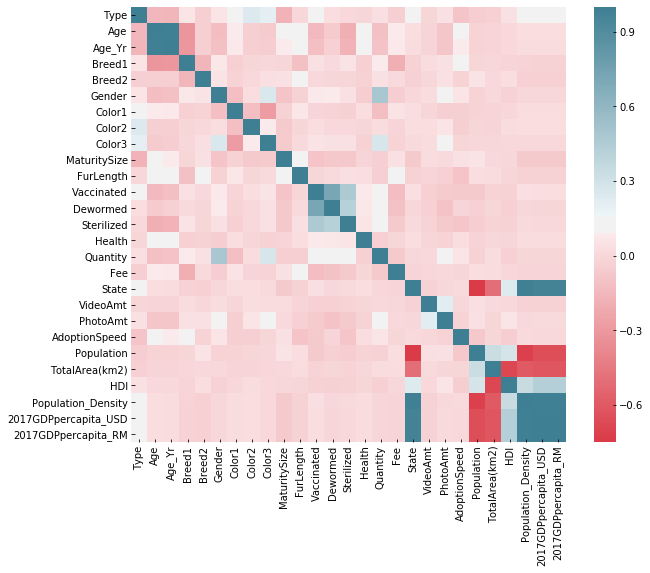

In [34]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = pet.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 220, as_cmap=True),
            square=True, ax=ax)

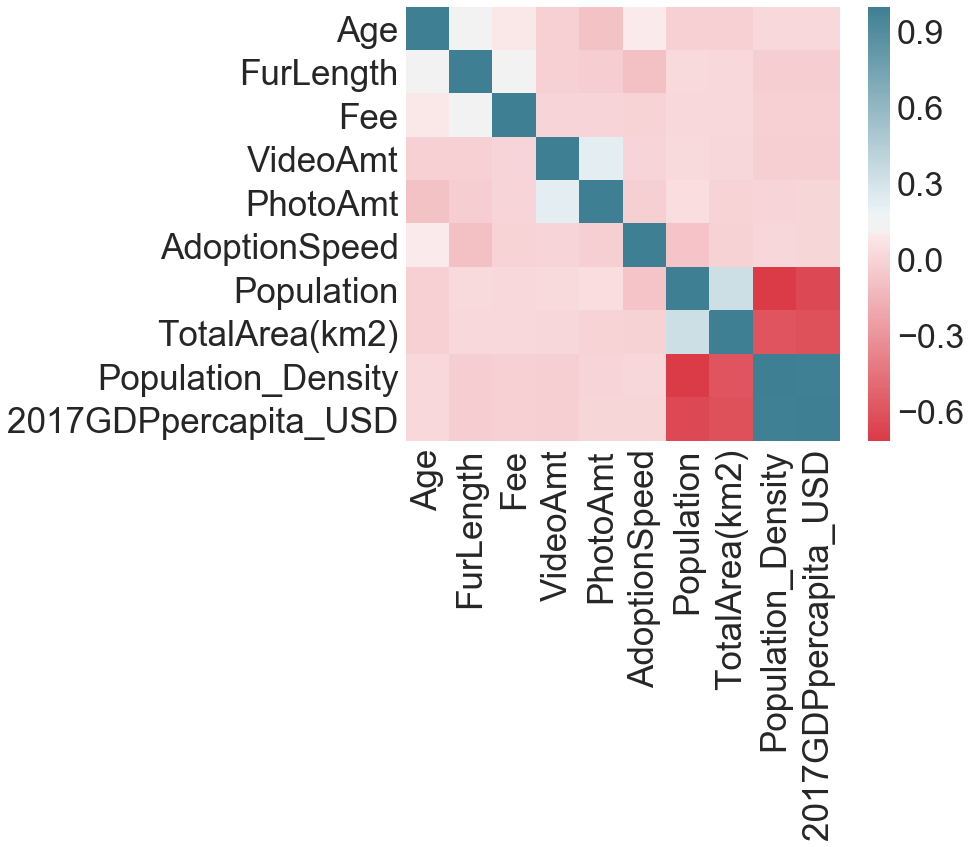

In [38]:
# correlation plot

correlation = pet[['Age', 'FurLength', 'Fee', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed', 'Population', 'TotalArea(km2)', 'Population_Density'
                  , '2017GDPpercapita_USD']]
                   
f, ax = plt.subplots(figsize=(10, 8))
corr = correlation.corr()
sns.set(font_scale=3.4)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 220, as_cmap=True),
            square=True, ax=ax)                   
                   

In [39]:
### Convert Data Types ### 
pet['Type'] = pet['Type'].astype('category')
pet['Breed1'] = pet['Breed1'].astype('category')
pet['Breed2'] = pet['Breed2'].astype('category')
pet['Color1'] = pet['Color1'].astype('category')
pet['Color2'] = pet['Color2'].astype('category')
pet['Color3'] = pet['Color3'].astype('category')
pet['MaturitySize'] = pet['MaturitySize'].astype('category')
pet['FurLength'] = pet['FurLength'].astype('category')
pet['Vaccinated'] = pet['Vaccinated'].astype('category')
pet['Dewormed'] = pet['Dewormed'].astype('category')
pet['Sterilized'] = pet['Sterilized'].astype('category')
pet['Health'] = pet['Health'].astype('category')
pet['Quantity'] = pet['Quantity'].astype('category')
pet['State'] = pet['State'].astype('category') 
pet['Gender'] = pet['Gender'].astype('category')  

fee_map = {'Fee': {'No Fee': 0, 'Fee': 1}}
pet.replace(fee_map, inplace=True)
pet['Fee'] = pet['Fee'].astype('category') 

stateterr_map = {'StateorTerritory': {'State': 1, 'Territory': 2}}
pet.replace(stateterr_map, inplace=True)
pet['StateorTerritory'] = pet['StateorTerritory'].astype('category') 

region_map = {'Region': {'East_Malaysia': 1, 'West_Malaysia': 2}}
pet.replace(region_map, inplace=True)
pet['Region'] = pet['Region'].astype('category') 

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [8]:
#combining same day - categories 0 and 1

pet1 = pet

pet1['AdoptionSpeed_New'] = np.where(pet1['AdoptionSpeed'] == 0, '1',
                                    np.where(pet1['AdoptionSpeed'] == 1, '1',
                                            np.where(pet1['AdoptionSpeed'] == 2, '2',
                                                    np.where(pet1['AdoptionSpeed'] == 3, '3', '4'))))

pet1.head()

,Type,Type_Name,Name,Age,Age_Yr,Breed1,Breed1_Name,Breed2,Breed2_Name,Gender,...,AdoptionSpeed,StateorTerritory,Population,TotalArea(km2),Region,HDI,Population_Density,2017GDPpercapita_USD,2017GDPpercapita_RM,AdoptionSpeed_New
0,2,Cat,Nibble,3,0,299,Tabby,0,0,1,...,2,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091,2
1,2,Cat,No Name Yet,1,0,265,Domestic Medium Hair,0,0,1,...,0,Territory,1768000,243,West_Malaysia,0.822,7275.720165,27991,111321,1
2,1,Dog,Brisco,1,0,307,Mixed Breed,0,0,1,...,3,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091,3
3,1,Dog,Miko,4,0,307,Mixed Breed,0,0,2,...,2,Territory,1768000,243,West_Malaysia,0.822,7275.720165,27991,111321,2
4,1,Dog,Hunter,1,0,307,Mixed Breed,0,0,1,...,2,State,5874100,8104,West_Malaysia,0.819,724.839585,12092,48091,2


In [14]:

###################### Combined 0 to 1 category modeling ######################

#dataprep

#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_pet1 = pet1[X_features]
X_pet1.replace(' ', '')
Y_pet1 = pet1['AdoptionSpeed_New']
Y_pet1 = Y_pet1.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_pet1, x_test_pet1, y_train_pet1, y_test_pet1 = model_selection.train_test_split(X_pet1, Y_pet1, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_pet1 = RandomForestClassifier(n_estimators = 30,
                                    max_features = 'log2',
                                    bootstrap = True,
                                    random_state = random_seed)
RF_pet1.fit(x_train_pet1, y_train_pet1)
y_pred_RF_pet1 = RF_pet1.predict(x_test_pet1)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_pet1, y_pred_RF_pet1))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_pet1, y_pred_RF_pet1))
print("Classification Report", "\n", classification_report(y_test_pet1, y_pred_RF_pet1))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_pet1.feature_importances_), X_features), reverse=True))


Accuracy Score 
 0.403134378126042
Confusion Matrix 
 [[275 187  85 126]
 [247 280 121 158]
 [140 177 162 164]
 [119 157 109 492]]
Classification Report 
              precision    recall  f1-score   support

          1       0.35      0.41      0.38       673
          2       0.35      0.35      0.35       806
          3       0.34      0.25      0.29       643
          4       0.52      0.56      0.54       877

avg / total       0.40      0.40      0.40      2999

Features sorted by their score:

[(0.1448, 'PhotoAmt'), (0.1324, 'Age'), (0.0872, 'Breed1'), (0.0825, 'Color2'), (0.0813, 'Color1'), (0.0549, 'Breed2'), (0.0519, 'Gender'), (0.0441, 'FurLength'), (0.0437, 'Color3'), (0.0412, 'MaturitySize'), (0.0395, 'Fee'), (0.0383, 'Dewormed'), (0.032, 'Vaccinated'), (0.0296, 'Sterilized'), (0.0165, 'Population'), (0.0148, 'TotalArea(km2)'), (0.0146, 'HDI'), (0.0137, 'Population_Density'), (0.0137, '2017GDPpercapita_USD'), (0.0129, 'VideoAmt'), (0.0104, 'Health')]


In [15]:
#eliminating same day adoptions

pet2 = pet[pet['AdoptionSpeed'] > 0]

pet2.describe()



,Type,Age,Age_Yr,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,VideoAmt,PhotoAmt,AdoptionSpeed,Population,TotalArea(km2),HDI,Population_Density,2017GDPpercapita_USD,2017GDPpercapita_RM
count,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,...,14583.000000,14583.000000,14583.000000,14583.000000,1.458300e+04,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000
mean,1.453953,10.452102,0.651581,265.686210,73.375300,1.777686,2.229445,3.214771,1.874237,1.864431,...,41345.987520,0.056641,3.905095,2.587191,4.209465e+06,6714.468011,0.814660,2393.731939,15811.806418,62884.682850
std,0.497892,18.166975,1.560306,59.847244,122.794251,0.682343,1.744326,2.741595,2.979947,0.544859,...,32.426313,0.347534,3.503282,1.114390,1.993182e+06,6919.875260,0.013872,2876.759344,7249.207416,28829.875232
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,41324.000000,0.000000,0.000000,1.000000,9.680000e+04,91.000000,0.674000,21.181197,3417.000000,13593.000000
25%,1.000000,2.000000,0.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,41326.000000,0.000000,2.000000,2.000000,1.768000e+06,243.000000,0.819000,724.839585,12092.000000,48091.000000
50%,1.000000,3.000000,0.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,41326.000000,0.000000,3.000000,3.000000,5.874100e+06,8104.000000,0.819000,724.839585,12092.000000,48091.000000
75%,2.000000,11.000000,0.000000,307.000000,169.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,41401.000000,0.000000,5.000000,4.000000,5.874100e+06,8104.000000,0.822000,7275.720165,27991.000000,111321.000000
max,2.000000,255.000000,21.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,41415.000000,8.000000,30.000000,4.000000,5.874100e+06,124450.000000,0.822000,7275.720165,27991.000000,111321.000000


In [18]:
###################### removing same day adoption modeling ######################

#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_pet2 = pet2[X_features]
X_pet2.replace(' ', '')
Y_pet2= pet2['AdoptionSpeed']
Y_pet2= Y_pet2.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_pet2, x_test_pet2, y_train_pet2, y_test_pet2= model_selection.train_test_split(X_pet2, Y_pet2, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_pet2 = RandomForestClassifier(n_estimators = 30,
                                    max_features = 'log2',
                                    bootstrap = True,
                                    random_state = random_seed)
RF_pet2.fit(x_train_pet2, y_train_pet2)
y_pred_RF_pet2 = RF_pet2.predict(x_test_pet2)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_pet2, y_pred_RF_pet2))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_pet2, y_pred_RF_pet2))
print("Classification Report", "\n", classification_report(y_test_pet2, y_pred_RF_pet2))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_pet2.feature_importances_), X_features), reverse=True))


Accuracy Score 
 0.40315392526568394
Confusion Matrix 
 [[216 187 103 119]
 [175 285 139 186]
 [112 190 196 175]
 [ 88 159 108 479]]
Classification Report 
              precision    recall  f1-score   support

          1       0.37      0.35      0.36       625
          2       0.35      0.36      0.35       785
          3       0.36      0.29      0.32       673
          4       0.50      0.57      0.53       834

avg / total       0.40      0.40      0.40      2917

Features sorted by their score:

[(0.1465, 'PhotoAmt'), (0.132, 'Age'), (0.086, 'Breed1'), (0.0847, 'Color2'), (0.0829, 'Color1'), (0.0561, 'Breed2'), (0.0536, 'Gender'), (0.044, 'Color3'), (0.0431, 'FurLength'), (0.0401, 'Fee'), (0.0387, 'MaturitySize'), (0.0367, 'Dewormed'), (0.0325, 'Vaccinated'), (0.0298, 'Sterilized'), (0.0164, 'Population'), (0.0151, 'TotalArea(km2)'), (0.0135, 'Population_Density'), (0.0133, 'HDI'), (0.0126, '2017GDPpercapita_USD'), (0.0122, 'VideoAmt'), (0.0103, 'Health')]


In [20]:
# XGBOOST model using all original classifications

#split into X & Y
X_features = ['Type', 'Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X = pet[X_features]
X.replace(' ', '')
Y = pet['AdoptionSpeed']
Y = Y.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = random_seed)

# fit model no training data
model_boost = XGBClassifier()
model_boost.fit(x_train, y_train)


# make predictions for test data
y_pred = model_boost.predict(x_test)

print("Accuracy Score \n", accuracy_score(y_test, y_pred))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, y_pred))
print("Classification Report", "\n", classification_report(y_test, y_pred))

Accuracy Score 
 0.40780260086695563
Confusion Matrix 
 [[  0  28  29   3  21]
 [  0 171 251  34 136]
 [  0 172 373  57 204]
 [  0  86 223 109 225]
 [  0  72 185  50 570]]
Classification Report 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        81
          1       0.32      0.29      0.31       592
          2       0.35      0.46      0.40       806
          3       0.43      0.17      0.24       643
          4       0.49      0.65      0.56       877

avg / total       0.39      0.41      0.38      2999



C:\Users\zkimpel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zkimpel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#XBOOST on removed 0 categories 
#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_pet2 = pet2[X_features]
X_pet2.replace(' ', '')
Y_pet2= pet2['AdoptionSpeed']
Y_pet2= Y_pet2.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_pet2, x_test_pet2, y_train_pet2, y_test_pet2= model_selection.train_test_split(X_pet2, Y_pet2, test_size = validation_size, random_state = random_seed)


#train the algorithm
# fit model no training data
model2_boost = XGBClassifier()
model2_boost.fit(x_train_pet2, y_train_pet2)


# make predictions for test data
y_pred_pet2 = model2_boost.predict(x_test_pet2)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_pet2, y_pred_pet2))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_pet2, y_pred_pet2))
print("Classification Report", "\n", classification_report(y_test_pet2, y_pred_pet2))

Accuracy Score 
 0.4052108330476517
Confusion Matrix 
 [[156 303  33 133]
 [139 363  66 217]
 [ 93 257 119 204]
 [ 79 169  42 544]]
Classification Report 
              precision    recall  f1-score   support

          1       0.33      0.25      0.29       625
          2       0.33      0.46      0.39       785
          3       0.46      0.18      0.26       673
          4       0.50      0.65      0.56       834

avg / total       0.41      0.41      0.39      2917



C:\Users\zkimpel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0,0.5,'Count')

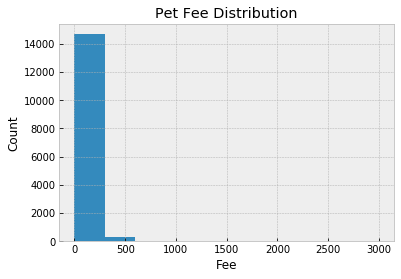

In [29]:
plt.hist(pet['Fee'])
plt.title("Pet Fee Distribution")
plt.xlabel("Fee")
plt.ylabel("Count")

Text(0,0.5,'Count')

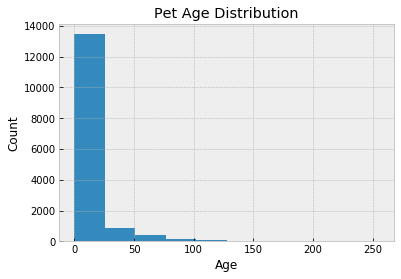

In [30]:
plt.hist(pet['Age'])
plt.title("Pet Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

In [32]:
####### variable creation for Fee vs. NO Fee 

pet['Fee_binary'] = np.where(pet['Fee'] > 0, '1', '0')

pet.head()
                                 

###################### replacing fee with binary fee modeling ######################

#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee_binary', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_fee = pet[X_features]
X_fee.replace(' ', '')
Y_fee= pet['AdoptionSpeed']
Y_fee= Y_fee.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_fee, x_test_fee, y_train_fee, y_test_fee= model_selection.train_test_split(X_fee, Y_fee, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_fee = RandomForestClassifier(n_estimators = 30,
                                    max_features = 'log2',
                                    bootstrap = True,
                                    random_state = random_seed)
RF_fee.fit(x_train_fee, y_train_fee)
y_pred_RF_fee = RF_fee.predict(x_test_fee)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_fee, y_pred_RF_fee))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_fee, y_pred_RF_fee))
print("Classification Report", "\n", classification_report(y_test_fee, y_pred_RF_fee))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_fee.feature_importances_), X_features), reverse=True))


### binary fee did not improve the model

Accuracy Score 
 0.3954651550516839
Confusion Matrix 
 [[  8  22  18   8  25]
 [  4 195 189  98 106]
 [  8 190 305 130 173]
 [  3 113 183 163 181]
 [  1  76 171 114 515]]
Classification Report 
              precision    recall  f1-score   support

          0       0.33      0.10      0.15        81
          1       0.33      0.33      0.33       592
          2       0.35      0.38      0.36       806
          3       0.32      0.25      0.28       643
          4       0.52      0.59      0.55       877

avg / total       0.39      0.40      0.39      2999

Features sorted by their score:

[(0.1444, 'PhotoAmt'), (0.133, 'Age'), (0.0863, 'Color2'), (0.0863, 'Breed1'), (0.0812, 'Color1'), (0.0565, 'Breed2'), (0.0564, 'Gender'), (0.0458, 'FurLength'), (0.0434, 'MaturitySize'), (0.0433, 'Color3'), (0.0364, 'Dewormed'), (0.0322, 'Vaccinated'), (0.0296, 'Sterilized'), (0.0261, 'Fee_binary'), (0.0167, 'Population'), (0.0159, 'TotalArea(km2)'), (0.0143, '2017GDPpercapita_USD'), (0.0142, '

In [41]:
####### variable creation for Fee vs. NO Fee 

pet3 = pet
pet3['SlowvsFast'] = np.where(pet3['AdoptionSpeed'] < 3, '0', '1')
#fast adoption = 0, slow adoption = 1 (fast = 0, 1, 2 & slow = 3, 4)

print(pet3.head())
                                 

###################### replacing fee with binary fee modeling ######################

#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee_binary', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_pet3 = pet3[X_features]
Y_pet3= pet3['SlowvsFast']
Y_pet3= Y_pet3.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_pet3, x_test_pet3, y_train_pet3, y_test_pet3= model_selection.train_test_split(X_pet3, Y_pet3, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_pet3 = RandomForestClassifier(n_estimators = 30,
                                    max_features = 'log2',
                                    bootstrap = True,
                                    random_state = random_seed)
RF_pet3.fit(x_train_pet3, y_train_pet3)
y_pred_RF_pet3 = RF_pet3.predict(x_test_pet3)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_pet3, y_pred_RF_pet3))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_pet3, y_pred_RF_pet3))
print("Classification Report", "\n", classification_report(y_test_pet3, y_pred_RF_pet3))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_pet3.feature_importances_), X_features), reverse=True))

#slow and fast resulted in 64% accuracy

  Type Type_Name         Name  Age  Age_Yr Breed1           Breed1_Name  \
0    2       Cat       Nibble    3       0    299                 Tabby   
1    2       Cat  No Name Yet    1       0    265  Domestic Medium Hair   
2    1       Dog       Brisco    1       0    307           Mixed Breed   
3    1       Dog         Miko    4       0    307           Mixed Breed   
4    1       Dog       Hunter    1       0    307           Mixed Breed   

  Breed2 Breed2_Name Gender    ...     Population TotalArea(km2)  \
0      0           0      1    ...        5874100           8104   
1      0           0      1    ...        1768000            243   
2      0           0      1    ...        5874100           8104   
3      0           0      2    ...        1768000            243   
4      0           0      1    ...        5874100           8104   

          Region    HDI Population_Density 2017GDPpercapita_USD  \
0  West_Malaysia  0.819         724.839585                12092   
1  Wes

In [42]:
####### variable creation for Fee vs. NO Fee 

pet4 = pet
pet4['SlowvsFast'] = np.where(pet4['AdoptionSpeed'] < 4, '0', '1')
#fast adoption = 0, slow adoption = 1 (fast = 0, 1, 2, 3 & slow = 4)

print(pet4.head())
                                 

###################### replacing fee with binary fee modeling ######################

#split into X & Y
X_features = ['Sterilized', 'Health', 'Fee_binary', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength']
X_pet4 = pet4[X_features]
Y_pet4= pet4['SlowvsFast']
Y_pet4= Y_pet4.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

x_train_pet4, x_test_pet4, y_train_pet4, y_test_pet4= model_selection.train_test_split(X_pet4, Y_pet4, test_size = validation_size, random_state = random_seed)


#train the algorithm

RF_pet4 = RandomForestClassifier(n_estimators = 30,
                                    max_features = 'log2',
                                    bootstrap = True,
                                    random_state = random_seed)
RF_pet4.fit(x_train_pet4, y_train_pet4)
y_pred_RF_pet4 = RF_pet4.predict(x_test_pet4)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test_pet4, y_pred_RF_pet4))
print("Confusion Matrix", "\n",  confusion_matrix(y_test_pet4, y_pred_RF_pet4))
print("Classification Report", "\n", classification_report(y_test_pet4, y_pred_RF_pet4))


#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF_pet4.feature_importances_), X_features), reverse=True))

#4 vs. not 4 resulted in 74% accuracy, but imbalanced dataset and the recall drops to 33% to catching the slow ones. 

  Type Type_Name         Name  Age  Age_Yr Breed1           Breed1_Name  \
0    2       Cat       Nibble    3       0    299                 Tabby   
1    2       Cat  No Name Yet    1       0    265  Domestic Medium Hair   
2    1       Dog       Brisco    1       0    307           Mixed Breed   
3    1       Dog         Miko    4       0    307           Mixed Breed   
4    1       Dog       Hunter    1       0    307           Mixed Breed   

  Breed2 Breed2_Name Gender    ...     Population TotalArea(km2)  \
0      0           0      1    ...        5874100           8104   
1      0           0      1    ...        1768000            243   
2      0           0      1    ...        5874100           8104   
3      0           0      2    ...        1768000            243   
4      0           0      1    ...        5874100           8104   

          Region    HDI Population_Density 2017GDPpercapita_USD  \
0  West_Malaysia  0.819         724.839585                12092   
1  Wes